In [ ]:
import pandas as pd

# Sample dataframe
data = {
    'O/S Cash USD': [100, 200, 150, 300, 400],
    'Cpty Name': ['Company A', 'Company B', 'Company A', 'Company C', 'Company B'],
    'Treated_Comments': ['Comment1', 'Comment2', 'Comment3', 'Comment4', 'Comment5'],
    'Treated_Fails_code': ['Code1', 'Code2', 'Code1', 'Code2', 'Code1']
}

df = pd.DataFrame(data)

# Group by 'Treated_Fails_code' and 'Cpty Name', then count occurrences
grouped = df.groupby(['Treated_Fails_code', 'Cpty Name']).size().reset_index(name='Count')

# Sort by 'Treated_Fails_code' and 'Count' in descending order
sorted_grouped = grouped.sort_values(by=['Treated_Fails_code', 'Count'], ascending=[True, False])

# Save the result to an Excel file
output_file = 'fails_code_counts.xlsx'
with pd.ExcelWriter(output_file) as writer:
    sorted_grouped.to_excel(writer, sheet_name='Fails_Code_Counts', index=False)

print(f"Data saved to {output_file}")


In [ ]:
import pandas as pd
import re

# Sample dataframe
data = {
    'O/S Cash USD': [100, 200, 150, 300, 400],
    'Cpty Name': ['Company A', 'Company B', 'Company A', 'Company C', 'Company B'],
    'Treated_Comments': [
        'Short to Deliver due to pending receipts from CP x',
        'Short to Deliver due to failing receipts from Cp b',
        'Cp a was short to deliver',
        'Firm was Short due to failing receipts from Cp b',
        'Cp a was short to deliver'
    ],
    'Treated_Fails_code': ['FTD', 'FTD', 'FTD', 'FTD', 'Other']
}

df = pd.DataFrame(data)

# Filter rows where 'Treated_Fails_code' is 'FTD'
ftd_df = df[df['Treated_Fails_code'] == 'FTD'].copy()

# Function to extract firm mentioned after 'from' or find other cases of failure to deliver
def extract_firm(comment):
    # Regular expression to find the firm after 'from'
    match = re.search(r'from\s([\w\s]+)', comment, re.IGNORECASE)
    if match:
        return match.group(1).strip()  # Return firm name after 'from'
    # Handle other patterns like 'Cp a was short to deliver'
    match_alt = re.search(r'([\w\s]+)\swas short to deliver', comment, re.IGNORECASE)
    if match_alt:
        return match_alt.group(1).strip()  # Return firm name before 'was short to deliver'
    return None  # If no match is found, return None

# Apply the extraction function to the 'Treated_Comments' column
ftd_df['Because of Which firm'] = ftd_df['Treated_Comments'].apply(extract_firm)

# Count the occurrences of FTD for each 'Cpty Name'
ftd_summary = ftd_df.groupby(['Cpty Name', 'Because of Which firm']).size().reset_index(name='Count')

# Save the result to the existing Excel file
output_file = 'fails_code_counts.xlsx'
with pd.ExcelWriter(output_file, mode='a', engine='openpyxl') as writer:
    # Save the new analysis in a new sheet
    ftd_summary.to_excel(writer, sheet_name='FTD_Analysis', index=False)

print(f"New analysis saved to {output_file}")


In [2]:
import xml.etree.ElementTree as ET

def add_name_tags_to_gpx(file_path, output_path):
    # Parse the GPX file
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Define namespaces used in GPX file
    ns = {'gpx': 'http://www.topografix.com/GPX/1/1'}

    # Iterate over all waypoints (wpt elements)
    for wpt in root.findall('gpx:wpt', ns):
        # Check if the waypoint has a 'name' child element
        name_tag = wpt.find('gpx:name', ns)
        
        # If no name tag exists, add an empty <name> tag
        if name_tag is None:
            ET.SubElement(wpt, '{http://www.topografix.com/GPX/1/1}name').text = ''

    # Write the modified tree back to an output file
    tree.write(output_path, encoding='utf-8', xml_declaration=True)

# Example usage
file_path = r'C:\Users\shara\Downloads\\28-new-york-city-1-new-york-united-states.gpx'  # Path to the input GPX file
output_path = 'output.gpx'  # Path to save the modified GPX file

add_name_tags_to_gpx(file_path, output_path)
print(f"Modified GPX saved to {output_path}")


Modified GPX saved to output.gpx


In [1]:
import xml.etree.ElementTree as ET

def add_name_tags_to_gpx(file_path, output_path):
    # Parse the GPX file
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Iterate over all <wpt> elements (waypoints)
    for wpt in root.findall('.//wpt'):
        # Check if <name> tag exists within the waypoint
        name_tag = wpt.find('name')
        
        # If <name> tag is missing, create an empty <name> tag
        if name_tag is None:
            name_element = ET.Element('name')
            name_element.text = ' '  # Add a space inside the <name> tag
            wpt.append(name_element)  # Append the new <name> tag to <wpt>

    # Write the modified tree back to an output file
    tree.write(output_path, encoding='utf-8', xml_declaration=True)

# Example usage
fname = '20-kyoto-1-honshu-japan.gpx'
file_path = f'C:/Users/shara/Downloads/{fname}'  # Path to the input GPX file
output_path = fname  # Path to save the modified GPX file

add_name_tags_to_gpx(file_path, output_path)
print(f"Modified GPX saved to {output_path}")


Modified GPX saved to 20-kyoto-1-honshu-japan.gpx


Analyzing AUM (Assets Under Management) vs. Trading Volume is important for evaluating the characteristics, liquidity, and stability of an investment vehicle, especially in the context of exchange-traded funds (ETFs) like IWM (iShares Russell 2000 ETF) or mutual funds. Here's why it's significant to consider both:

1. Liquidity
AUM reflects the total value of assets held by a fund. Larger AUM generally means the fund has more capital invested in its underlying assets, which can indicate higher liquidity and easier execution of trades without significantly impacting the price.
Trading Volume represents how many shares of the fund are traded in the market during a given time period (usually daily volume). High trading volume ensures better liquidity because it means there are more buyers and sellers, allowing investors to enter and exit positions with less price impact.
Why it's important: A fund with high AUM but low trading volume might indicate that the fund holds a lot of assets, but there may not be enough daily activity in the market for investors to easily buy or sell shares. On the other hand, high trading volume without significant AUM could signal speculative activity or short-term trading, which might not reflect the long-term strength or stability of the fund.

2. Market Impact
AUM indicates the scale of a fund’s holdings. Large AUM in an ETF implies that the fund holds a significant portion of the underlying assets. If such a fund starts making large trades (due to inflows or outflows), it could potentially impact the market for those assets.
Trading Volume helps investors gauge how much influence market trades have on the fund's price. If trading volume is low, large buy or sell orders can lead to higher volatility and price swings. However, if volume is high, these trades might have little impact.
Why it's important: A mismatch between AUM and trading volume can impact how easily an investor can execute large trades. A fund with high AUM and low trading volume could be hard to exit without causing price disruption.

3. Tracking Efficiency
AUM can influence how well an ETF tracks its benchmark index. Funds with higher AUM typically have better access to resources for managing and balancing the portfolio, which allows them to track their index more accurately.
Trading Volume affects the pricing of the ETF relative to its Net Asset Value (NAV). If trading volume is low, the ETF’s market price might deviate from the value of its underlying assets (NAV), leading to pricing inefficiencies.
Why it's important: A high-AUM, high-trading-volume ETF tends to offer better tracking of its benchmark index and provide tighter spreads between the ETF price and NAV, making it more efficient for both long-term and short-term investors.

4. Cost Efficiency
AUM is often linked to the fund's expense ratio. Larger funds can spread operational costs over more assets, which might result in lower expense ratios and make the fund more cost-effective for investors.
Trading Volume affects transaction costs for buying and selling shares. Higher volume generally leads to narrower bid-ask spreads, meaning lower costs for traders who want to move in and out of positions.
Why it's important: For long-term investors, a fund with high AUM but low trading volume might still be appealing because of its low expense ratio, even if it’s harder to trade. For active traders, high trading volume is more crucial to minimize transaction costs.

5. Investor Sentiment and Fund Stability
AUM can indicate investor confidence and stability. A growing AUM shows that more investors are pouring money into the fund, which can signal that the fund is stable and in demand.
Trading Volume can indicate investor sentiment and market activity. If trading volume spikes, it could indicate increased interest in the fund, either due to market volatility, news, or changes in the underlying assets.
Why it's important: A fund with large AUM and consistent trading volume is typically considered more stable and reliable, while a sudden drop in AUM or abnormal trading volume spikes could be red flags for investors.

Conclusion:
AUM helps measure the size, long-term stability, and efficiency of a fund.
Trading Volume helps gauge liquidity, market sentiment, and transaction costs.
Analyzing both together provides a comprehensive view of the fund’s liquidity, efficiency, and cost-effectiveness. High AUM with high trading volume generally indicates a well-rounded, liquid, and stable fund, whereas discrepancies between the two can suggest potential liquidity issues or speculative trading.

In [ ]:
import pandas as pd

# Sample DataFrame
data = {
    'Trader Names': ['{Trader A}, {Trader B}', '{Trader C}', '{Trader D}, {Trader E}', '{Trader A}', '{Trader B}'],
    'USD Difference': [5000, -7000, 2000, -3000, 1500],
    'Fund House': ['Fund X', 'Fund Y', 'Fund Z', 'Fund X', 'Fund Y']
}

df = pd.DataFrame(data)

# Step 1: Clean the Trader Names column
# Remove curly braces and split multiple traders into lists
df['Trader Names'] = df['Trader Names'].str.replace(r'{|}', '', regex=True)
df['Trader Names'] = df['Trader Names'].str.split(', ')

# Step 2: Expand the DataFrame so each trader has their own row
df_expanded = df.explode('Trader Names')

# Step 3: Group by Trader Names and sum the USD Difference
trader_summary = df_expanded.groupby('Trader Names', as_index=False)['USD Difference'].sum()

# Step 4: Sort to identify top positive and negative USD Differences
top_negative_traders = trader_summary.sort_values(by='USD Difference').head()
top_positive_traders = trader_summary.sort_values(by='USD Difference', ascending=False).head()

# Display results
print("Top Negative Traders:\n", top_negative_traders)
print("Top Positive Traders:\n", top_positive_traders)


In [ ]:
import pandas as pd

# Sample data
data = {
    'Trader Names': ['Trader A', 'Trader B'],
    'USD Difference': [5000, -3000],
    'Trade Date': ['31-AUG-24', '15-SEP-24']  # Dates in 'DD-MON-YY' format as strings
}

# Create DataFrame and convert 'Trade Date' to datetime
df = pd.DataFrame(data)
df['Trade Date'] = pd.to_datetime(df['Trade Date'], format='%d-%b-%y')

# Save to Excel with the date format 'DD-MON-YY'
writer = pd.ExcelWriter('trades.xlsx', engine='xlsxwriter')

# Write the dataframe to Excel
df.to_excel(writer, sheet_name='Sheet1', index=False)

# Get the xlsxwriter workbook and worksheet objects
workbook  = writer.book
worksheet = writer.sheets['Sheet1']

# Define a date format
date_format = workbook.add_format({'num_format': 'DD-MON-YY'})

# Apply the date format to the 'Trade Date' column (assuming it's in the third column, index 2)
worksheet.set_column('C:C', None, date_format)

# Save the Excel file
writer.save()


In [ ]:
import pandas as pd

# Sample dataframe with necessary columns
data = {
    'OS Cash': [1000, 2000, -1500, 3000, -4000],
    'Operation Type': ['BUY', 'SELL', 'REC', 'DEL', 'CREC'],
    'WCOFF_RATE': [0.5, 0.6, 0.7, 0.8, 0.9],
    'FX_RATE': [1.1, 1.2, 1.3, 1.4, 1.5]
}

df = pd.DataFrame(data)

# Define the operation types that correspond to the two cases
buy_rec_types = ['BUY', 'REC', 'CDEL', 'CSEL']
sell_del_types = ['SELL', 'DEL', 'CREC', 'CBUY']

# Apply the formula based on the 'Operation Type'
df['WCOF USD'] = df.apply(
    lambda row: ((-1 * row['OS Cash'] * row['WCOFF_RATE']) / 36000) * row['FX_RATE']
    if row['Operation Type'] in buy_rec_types else
    ((1 * row['OS Cash'] * row['WCOFF_RATE']) / 36000) * row['FX_RATE'],
    axis=1
)

# Show the result
print(df)


In [ ]:
import pandas as pd
import re

# Sample dataframe
data = {
    'O/S Cash USD': [100, -200, 150, -300, 400],
    'Cpty Name': ['Company A', 'Company B', 'Company A', 'Company C', 'Company B'],
    'Treated_Comments': [
        'Short to Deliver due to pending receipts from CP x',
        'Short to Deliver due to failing receipts from Cp b',
        'Cp a was short to deliver',
        'Firm was Short due to failing receipts from Cp b',
        'Cp a was short to deliver'
    ],
    'Treated_Fails_code': ['FTD', 'FTD', 'FTD', 'FTD', 'FTR']  # FTR added for testing positive case
}

df = pd.DataFrame(data)

# Filter rows where 'Treated_Fails_code' is 'FTD' (Fail to Deliver) or 'FTR' (Fail to Receive)
ftd_df = df[df['Treated_Fails_code'].isin(['FTD', 'FTR'])].copy()

# Function to extract firm mentioned after 'from' or find other cases of failure to deliver (only for FTD rows)
def extract_firm(comment, fails_code):
    if fails_code == 'FTD':
        # Regular expression to find the firm after 'from'
        match = re.search(r'from\s([\w\s]+)', comment, re.IGNORECASE)
        if match:
            return match.group(1).strip()  # Return firm name after 'from'
        # Handle other patterns like 'Cp a was short to deliver'
        match_alt = re.search(r'([\w\s]+)\swas short to deliver', comment, re.IGNORECASE)
        if match_alt:
            return match_alt.group(1).strip()  # Return firm name before 'was short to deliver'
    return None  # If no match is found or it's not an FTD row, return None

# Apply the extraction function to the 'Treated_Comments' column for only 'FTD' rows
ftd_df['Because of Which firm'] = ftd_df.apply(lambda row: extract_firm(row['Treated_Comments'], row['Treated_Fails_code']), axis=1)

# Separate columns for positive and negative 'O/S Cash USD'
ftd_df['-WCOF'] = ftd_df.apply(lambda x: x['O/S Cash USD'] if x['Treated_Fails_code'] == 'FTD' else None, axis=1)
ftd_df['+WCOF'] = ftd_df.apply(lambda x: x['O/S Cash USD'] if x['Treated_Fails_code'] == 'FTR' else None, axis=1)

# Count the occurrences of FTD/FTR for each 'Cpty Name' and 'Because of Which firm'
ftd_summary = ftd_df.groupby(['Cpty Name', 'Because of Which firm']).agg({
    '-WCOF': 'sum',  # Sum of negative WCOF (Fail to Deliver)
    '+WCOF': 'sum',  # Sum of positive WCOF (Fail to Receive)
    'Treated_Fails_code': 'count'  # Count of occurrences
}).reset_index().rename(columns={'Treated_Fails_code': 'Count'})

# Save the result to the existing Excel file
output_file = 'fails_code_counts_wcof.xlsx'
with pd.ExcelWriter(output_file, mode='a', engine='openpyxl') as writer:
    # Save the new analysis in a new sheet
    ftd_summary.to_excel(writer, sheet_name='FTD_FTR_WCOF_Analysis', index=False)

print(f"New analysis saved to {output_file}")


In [1]:
import pandas as pd
x = pd.read_csv('C:\\Users\\shara\\Downloads\\50100624741139_1729694304537.txt',delimiter=',', on_bad_lines='skip')
x.columns = x.columns.str.replace(' ','')
y = pd.read_csv('C:\\Users\\shara\\Downloads\\50100624741139_1729694704016.txt',delimiter=',', on_bad_lines='skip')
y.columns = y.columns.str.replace(' ','')
df = pd.concat([x,y], ignore_index=True)
df.shape

(1529, 7)

In [2]:
df.drop_duplicates(inplace=True)
df

,Date,Narration,ValueDat,DebitAmount,CreditAmount,Chq/RefNumber,ClosingBalance
0,25/05/23,NEFT CR-ICIC0002564-SALARY NOMURA MAY 2023-SHA...,25/05/23,0.0,141584.0,000CMS3310690898,141584.00
1,25/05/23,UPI-SHARAN DHANPAL SHETT-SHARANSHETTY.001@OKAX...,25/05/23,1000.0,0.0,0000314595235993,140584.00
2,26/05/23,UPI-SWIGGY-SWIGGYUPI@AXISBANK-UTIB0000000-3146...,26/05/23,242.0,0.0,0000314641967477,140342.00
3,26/05/23,UPI-SWIGGY-UPISWIGGY@ICICI-ICIC0DC0099-3146426...,26/05/23,237.0,0.0,0000314642692160,140105.00
4,27/05/23,UPI-QUADRILLION FINANCE -QUADRILLION.SLICE@YES...,27/05/23,3149.0,0.0,0000314757289586,136956.00
...,...,...,...,...,...,...,...
1524,22/10/24,UPI-GRAND REGENCY-Q713657152@YBL-YESB0YBLUPI-4...,22/10/24,500.0,0.0,0000429619096725,21012.78
1525,22/10/24,UPI-SHIVANANDA S-SHIVANANDA.6919@WAAXIS-BARB0V...,22/10/24,120.0,0.0,0000429620010091,20892.78
1526,22/10/24,UPI-VAGESH BUDARAKATTIMA-8095023335-3@IBL-KARB...,22/10/24,899.0,0.0,0000429644966460,19993.78
1527,22/10/24,UPI-VISALAKSHI MARKETING-PAYPHIVISALAKSHIMKTPV...,22/10/24,340.0,0.0,0000429647554171,19653.78


In [27]:
import pandas as pd
df = x.copy()
# Assuming your bank statement DataFrame is called 'df'
# Replace this with the actual DataFrame or CSV file you're working with
# df = pd.read_csv('path_to_your_bank_statement.csv')

# Filter for spends related to SWIGGY
swiggy_spends = df[df['Narration'].str.contains('SWIGGY', case=False, na=False)]

# Filter for online shopping spends
shopping_keywords = [
    "Myntra", "Ajio", "Zara", "H&M", "Fabindia", "Biba", "Pantaloons", 
    "Shoppers Stop", "Lifestyle", "Marks & Spencer", "Levi's", "Max Fashion", 
    "Raymond", "Forever 21", "AND", "Vero Moda", "Van Heusen", "W", 
    "Peter England", "Louis Philippe", "Allen Solly", "Westside", "Reliance Retail", 
    "Big Bazaar", "DMart", "Shoppers Stop", "Lifestyle", "Pantaloons", 
    "Max Fashion", "Westside", "Central", "More Retail", "Spencer’s Retail", 
    "V-Mart", "Croma", "Reliance Digital", "Vijay Sales", "Amazon", "Flipkart", 
    "Tata CLiQ", "Samsung", "Apple", "Sony", "LG", "Dell", "HP", "Mi (Xiaomi)", 
    "OnePlus", "Vivo", "Oppo", "BookMyShow", "PVR Cinemas", "INOX", 
    "Sathyam Cinemas", "Amazon Prime Video", "Netflix", "Zee5", "Disney+ Hotstar", 
    "Spotify", "JioSaavn", "Gaana", "Tata Sky", "Dish TV", "Sun Direct", 
    "Pepperfry", "Urban Ladder", "IKEA", "HomeTown", "Godrej Interio", 
    "Nilkamal", "Durian", "Wakefit", "Fabindia", "Livspace", "Asian Paints Home Solutions", 
    "Home Centre", "D'Decor", "1mg", "Netmeds", "PharmEasy", "Medlife", 
    "Apollo Pharmacy", "MedPlus", "Wellness Forever", "Guardian Pharmacy", 
    "DawaBazaar", "Nykaa", "Purplle", "The Body Shop", "Forest Essentials", 
    "Sephora", "Lush", "Sugar Cosmetics", "Mamaearth", "WOW Skin Science", 
    "Himalaya", "Dabur", "Lakme", "L'Oréal", "Biotique", "Khadi Naturals", 
    "Ola", "Uber", "Zoomcar", "Meru Cabs", "ANI Technologies", "Rapido", 
    "Drivezy", "BluSmart", "Heads Up For Tails", "Pets World", "DogSpot", 
    "Petsy", "Pawfect", "PetKonnect", "Just Dogs", "Amazon Pets", "Flipkart Pets", 
    "PetSutra", "Amazon", "Flipkart", "Meesho", "Ajio", "Paytm Mall", 
    "Snapdeal", "ShopClues", "Club Factory"
]


shopping_spends = df[df['Narration'].str.contains('|'.join(shopping_keywords), case=False, na=False)]

# Filter for other spends (not related to SWIGGY or online shopping)
other_spends = df[~df['Narration'].str.contains('SWIGGY|' + '|'.join(shopping_keywords), case=False, na=False)]

# Sum the Debit Amount for each category
swiggy_total = swiggy_spends['DebitAmount'].sum()
shopping_total = shopping_spends['DebitAmount'].sum()
other_total = other_spends['DebitAmount'].sum()
total = df['DebitAmount'].sum()
# # Print the results
# print(f"Total spent in Statement: {total}")
# print(f"Total spent on SWIGGY: {swiggy_total}")
# print(f"Total spent on Online Shopping: {shopping_total}")
# print(f"Total spent on Other Expenses: {other_total}")

# List of keywords to exclude from 'Other' category
exclusion_keywords = ['Fuel', 'Rent', 'EMI', 'Wallet', 'Jewellery', 'Government']

# Filter other spends excluding the categories mentioned
other_spends_excluded = other_spends[~other_spends['Narration'].str.contains('|'.join(exclusion_keywords), case=False, na=False)]

# Calculate cashback for SWIGGY, Shopping, and Other spends
swiggy_cashback = min(swiggy_total * 0.10, 1500)  # 10% cashback capped at 1500
shopping_cashback = min(shopping_total * 0.05, 1500)  # 5% cashback capped at 1500
other_spends_total = other_spends_excluded['DebitAmount'].sum()
other_cashback = min(other_spends_total * 0.01, 500)  # 1% cashback capped at 500

# Calculate total savings
total_savings = swiggy_cashback + shopping_cashback + other_cashback

# Print the results
print(f"Total spent in Statement: {total}")
print(f"Total spent on SWIGGY: {swiggy_total}, Cashback: {swiggy_cashback}")
print(f"Total spent on Online Shopping: {shopping_total}, Cashback: {shopping_cashback}")
print(f"Total spent on Other Expenses: {other_spends['DebitAmount'].sum()}, Total spent on Other Expenses (excluding exclusions): {other_spends_total}, Cashback: {other_cashback}")
print(f"Total Savings: {total_savings}")
print(f"Total Savings Yearly: {total_savings*12}")

Total spent in Statement: 185162.22000000003
Total spent on SWIGGY: 6208.0, Cashback: 620.8000000000001
Total spent on Online Shopping: 86858.02, Cashback: 1500
Total spent on Other Expenses: 98304.20000000001, Total spent on Other Expenses (excluding exclusions): 47349.2, Cashback: 473.49199999999996
Total Savings: 2594.2920000000004
Total Savings Yearly: 31131.504000000004


C:\Users\shara\AppData\Local\Temp\ipykernel_41288\2285031644.py:38: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  shopping_spends = df[df['Narration'].str.contains('|'.join(shopping_keywords), case=False, na=False)]
C:\Users\shara\AppData\Local\Temp\ipykernel_41288\2285031644.py:41: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  other_spends = df[~df['Narration'].str.contains('SWIGGY|' + '|'.join(shopping_keywords), case=False, na=False)]


In [3]:
import pandas as pd

# Assuming 'Date' column contains the date of the transaction and is in string format
# Convert the 'Date' column to datetime format if not already done
df.dropna(subset=['Date'],inplace=True)
df['Date'] = df['Date'].str.replace(' ','')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')
# Add a new column for year and month
df['YearMonth'] = df['Date'].dt.to_period('M')  # 'M' groups by month-year

# List of keywords to exclude from 'Other' category
exclusion_keywords = ['Fuel', 'Rent', 'EMI', 'Wallet', 'Jewellery', 'Government']

# Create a list to store the results for each month
monthly_report = []

# Filter for online shopping spends
shopping_keywords = [
    "Myntra", "Ajio", "Zara", "H&M", "Fabindia", "Biba", "Pantaloons", 
    "Shoppers Stop", "Lifestyle", "Marks & Spencer", "Levi's", "Max Fashion", 
    "Raymond", "Forever 21", "AND", "Vero Moda", "Van Heusen", "W", 
    "Peter England", "Louis Philippe", "Allen Solly", "Westside", "Reliance Retail", 
    "Big Bazaar", "DMart", "Shoppers Stop", "Lifestyle", "Pantaloons", 
    "Max Fashion", "Westside", "Central", "More Retail", "Spencer’s Retail", 
    "V-Mart", "Croma", "Reliance Digital", "Vijay Sales", "Amazon", "Flipkart", 
    "Tata CLiQ", "Samsung", "Apple", "Sony", "LG", "Dell", "HP", "Mi (Xiaomi)", 
    "OnePlus", "Vivo", "Oppo", "BookMyShow", "PVR Cinemas", "INOX", 
    "Sathyam Cinemas", "Amazon Prime Video", "Netflix", "Zee5", "Disney+ Hotstar", 
    "Spotify", "JioSaavn", "Gaana", "Tata Sky", "Dish TV", "Sun Direct", 
    "Pepperfry", "Urban Ladder", "IKEA", "HomeTown", "Godrej Interio", 
    "Nilkamal", "Durian", "Wakefit", "Fabindia", "Livspace", "Asian Paints Home Solutions", 
    "Home Centre", "D'Decor", "1mg", "Netmeds", "PharmEasy", "Medlife", 
    "Apollo Pharmacy", "MedPlus", "Wellness Forever", "Guardian Pharmacy", 
    "DawaBazaar", "Nykaa", "Purplle", "The Body Shop", "Forest Essentials", 
    "Sephora", "Lush", "Sugar Cosmetics", "Mamaearth", "WOW Skin Science", 
    "Himalaya", "Dabur", "Lakme", "L'Oréal", "Biotique", "Khadi Naturals", 
    "Ola", "Uber", "Zoomcar", "Meru Cabs", "ANI Technologies", "Rapido", 
    "Drivezy", "BluSmart", "Heads Up For Tails", "Pets World", "DogSpot", 
    "Petsy", "Pawfect", "PetKonnect", "Just Dogs", "Amazon Pets", "Flipkart Pets", 
    "PetSutra", "Amazon", "Flipkart", "Meesho", "Ajio", "Paytm Mall", 
    "Snapdeal", "ShopClues", "Club Factory"
]



# Loop through each unique month
for month in df['YearMonth'].unique():
    # Filter the data for the current month
    monthly_data = df[df['YearMonth'] == month].copy()
    
    # Filter for spends related to SWIGGY
    swiggy_spends = monthly_data[monthly_data['Narration'].str.contains('SWIGGY', case=False, na=False)]
    
    # Filter for online shopping spends
    shopping_spends = monthly_data[monthly_data['Narration'].str.contains('|'.join(shopping_keywords), case=False, na=False)]
    
    # Filter for other spends (not related to SWIGGY or online shopping)
    other_spends = monthly_data[~monthly_data['Narration'].str.contains('SWIGGY|' + '|'.join(shopping_keywords), case=False, na=False)]
    
    # Exclude spends related to Fuel, Rent, EMI, Wallet, Jewellery, and Government
    other_spends_excluded = other_spends[~other_spends['Narration'].str.contains('|'.join(exclusion_keywords), case=False, na=False)]
    
    # Sum the Debit Amount for each category
    swiggy_total = swiggy_spends['DebitAmount'].sum()
    shopping_total = shopping_spends['DebitAmount'].sum()
    other_total = other_spends_excluded['DebitAmount'].sum()
    
    # Calculate cashback for each category
    swiggy_cashback = min(swiggy_total * 0.10, 1500)  # 10% cashback capped at 1500
    shopping_cashback = min(shopping_total * 0.05, 1500)  # 5% cashback capped at 1500
    other_cashback = min(other_total * 0.01, 500)  # 1% cashback capped at 500
    
    # Calculate total cashback for the month
    total_savings = swiggy_cashback + shopping_cashback + other_cashback
    
    # Store the results for the month
    monthly_report.append({
        'Month': str(month),
        'Swiggy Spend': swiggy_total,
        'Swiggy Cashback': swiggy_cashback,
        'Shopping Spend': shopping_total,
        'Shopping Cashback': shopping_cashback,
        'Other Spend (Excluding exclusions)': other_total,
        'Other Cashback': other_cashback,
        'Total Cashback': total_savings
    })

# Convert the report into a DataFrame
monthly_report_df = pd.DataFrame(monthly_report)

# Display the monthly report
print(monthly_report_df)

# If you want to save this report to a CSV file
monthly_report_df.to_csv('C:\\Users\\shara\\Downloads\\monthly_cashback_report.csv', index=False)

# Optionally, you can calculate yearly savings by summing the total cashback
yearly_savings = monthly_report_df['Total Cashback'].sum()
print(f"Total Savings Yearly: {yearly_savings}")


C:\Users\shara\AppData\Local\Temp\ipykernel_6364\2292688736.py:55: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  shopping_spends = monthly_data[monthly_data['Narration'].str.contains('|'.join(shopping_keywords), case=False, na=False)]
C:\Users\shara\AppData\Local\Temp\ipykernel_6364\2292688736.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  other_spends = monthly_data[~monthly_data['Narration'].str.contains('SWIGGY|' + '|'.join(shopping_keywords), case=False, na=False)]


      Month  Swiggy Spend  Swiggy Cashback  Shopping Spend  Shopping Cashback  \
0   2023-05        3411.0            341.1        29455.42          1472.7710   
1   2023-06        1351.0            135.1        22890.00          1144.5000   
2   2023-07        1337.0            133.7        20509.84          1025.4920   
3   2023-08         227.0             22.7         6812.00           340.6000   
4   2023-09        3217.0            321.7         7169.23           358.4615   
5   2023-10        3483.0            348.3        16752.58           837.6290   
6   2023-11        5490.0            549.0       110109.78          1500.0000   
7   2023-12        5257.0            525.7        53722.11          1500.0000   
8   2024-01        5359.0            535.9        21355.45          1067.7725   
9   2024-02        8146.0            814.6        37705.34          1500.0000   
10  2024-03        7824.0            782.4        37549.21          1500.0000   
11  2024-04        3002.0   

In [1]:
import os

def convert_jpg_to_lowercase(directory):
    # Iterate through all files in the directory
    for filename in os.listdir(directory):
        # Check if the file has a .JPG extension
        if filename.endswith('.JPG'):
            # Define old and new file paths
            old_file = os.path.join(directory, filename)
            new_file = os.path.join(directory, filename[:-4] + '.jpg')
            
            # Rename the file to have a lowercase .jpg extension
            os.rename(old_file, new_file)
            print(f"Renamed: {filename} -> {filename[:-4] + '.jpg'}")

# Specify the directory containing the .JPG files
directory_path = 'D:\Sharan\\backup gallery test'
convert_jpg_to_lowercase(directory_path)


Renamed: 00b11285-b263-4977-9393-e2fe89d7fd28.JPG -> 00b11285-b263-4977-9393-e2fe89d7fd28.jpg
Renamed: 00d8fea2-540b-4daa-ad5e-7ffcd36217b8.JPG -> 00d8fea2-540b-4daa-ad5e-7ffcd36217b8.jpg
Renamed: 0a02a8c7-5e7e-4b63-8f2e-10af15c89270 2.JPG -> 0a02a8c7-5e7e-4b63-8f2e-10af15c89270 2.jpg
Renamed: 0a02a8c7-5e7e-4b63-8f2e-10af15c89270.JPG -> 0a02a8c7-5e7e-4b63-8f2e-10af15c89270.jpg
Renamed: 0a1b25a0-4db8-4d8f-9fa6-b7d773cd0fa4.JPG -> 0a1b25a0-4db8-4d8f-9fa6-b7d773cd0fa4.jpg
Renamed: 0ad45118-586e-4dd0-a726-8ad3685f46e8.JPG -> 0ad45118-586e-4dd0-a726-8ad3685f46e8.jpg
Renamed: 0b7e6db1-af1f-4137-807c-34139a79d82d.JPG -> 0b7e6db1-af1f-4137-807c-34139a79d82d.jpg
Renamed: 0b945af0-bcd0-4126-bd13-108b1e9b888a.JPG -> 0b945af0-bcd0-4126-bd13-108b1e9b888a.jpg


In [2]:
from PIL import Image
import os

def check_megapixels(directory, max_megapixels=200):
    for filename in os.listdir(directory):
        # Process only .jpg or .JPG files
        if filename.lower().endswith('.jpg'):
            file_path = os.path.join(directory, filename)
            try:
                with Image.open(file_path) as img:
                    width, height = img.size
                    megapixels = (width * height) / 1_000_000  # Calculate in megapixels
                    
                    if megapixels > max_megapixels:
                        print(f"{filename} exceeds {max_megapixels} MP: {megapixels:.2f} MP")
                    else:
                        print(f"{filename} is within limit: {megapixels:.2f} MP")
            except Exception as e:
                print(f"Error processing {filename}: {e}")

# Specify the directory containing the images
directory_path = 'D:\Sharan\\backup gallery test'
check_megapixels(directory_path)

00d8fea2-540b-4daa-ad5e-7ffcd36217b8.jpg is within limit: 0.76 MP
0a02a8c7-5e7e-4b63-8f2e-10af15c89270 2.jpg is within limit: 1.23 MP
0a02a8c7-5e7e-4b63-8f2e-10af15c89270.jpg is within limit: 1.23 MP
0a1b25a0-4db8-4d8f-9fa6-b7d773cd0fa4.jpg is within limit: 1.44 MP
0ad45118-586e-4dd0-a726-8ad3685f46e8.jpg is within limit: 1.94 MP
0b7e6db1-af1f-4137-807c-34139a79d82d.jpg is within limit: 1.23 MP
0b945af0-bcd0-4126-bd13-108b1e9b888a.jpg is within limit: 1.23 MP
kiryu.jpg is within limit: 2.36 MP


In [5]:
from PIL import Image
import os
import piexif

def convert_to_jpg(directory):
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
            file_path = os.path.join(directory, filename)
            try:
                with Image.open(file_path) as img:
                    # Load EXIF data
                    exif_data = piexif.load(img.info.get("exif", b""))
                    date_taken = exif_data.get('Exif', {}).get(piexif.ExifIFD.DateTimeOriginal)
                    
                    # Convert and save as JPG while preserving EXIF data
                    new_file = file_path.rsplit('.', 1)[0] + ".jpg"
                    img.convert("RGB").save(new_file, "JPEG", exif=piexif.dump(exif_data))
                    print(f"Converted: {filename} -> {new_file}")
            except Exception as e:
                print(f"Could not convert {filename}: {e}")

def resize_large_images(directory, max_pixels=200):
    for filename in os.listdir(directory):
        if filename.lower().endswith('.jpg'):
            file_path = os.path.join(directory, filename)
            try:
                with Image.open(file_path) as img:
                    # Load EXIF data
                    exif_data = piexif.load(img.info.get("exif", b""))
                    
                    # Check image size in megapixels
                    width, height = img.size
                    megapixels = (width * height) / 1_000_000
                    
                    if megapixels > max_pixels:
                        scale_factor = (max_pixels * 1_000_000 / (width * height)) ** 0.5
                        new_size = (int(width * scale_factor), int(height * scale_factor))
                        img = img.resize(new_size, Image.ANTIALIAS)
                        
                        # Save resized image with original EXIF data
                        img.save(file_path, "JPEG", exif=piexif.dump(exif_data))
                        print(f"Resized {filename} to {new_size}")
            except Exception as e:
                print(f"Could not resize {filename}: {e}")

# Use the directory path containing your photos
directory_path = 'D:/Sharan/backup gallery test'
convert_to_jpg(directory_path)
resize_large_images(directory_path)


Converted: 00b11285-b263-4977-9393-e2fe89d7fd28.JPG -> D:/Sharan/backup gallery test\00b11285-b263-4977-9393-e2fe89d7fd28.jpg
Converted: 00d8fea2-540b-4daa-ad5e-7ffcd36217b8.JPG -> D:/Sharan/backup gallery test\00d8fea2-540b-4daa-ad5e-7ffcd36217b8.jpg
Converted: 0a02a8c7-5e7e-4b63-8f2e-10af15c89270 2.JPG -> D:/Sharan/backup gallery test\0a02a8c7-5e7e-4b63-8f2e-10af15c89270 2.jpg
Converted: 0a02a8c7-5e7e-4b63-8f2e-10af15c89270.JPG -> D:/Sharan/backup gallery test\0a02a8c7-5e7e-4b63-8f2e-10af15c89270.jpg
Converted: 0a1b25a0-4db8-4d8f-9fa6-b7d773cd0fa4.JPG -> D:/Sharan/backup gallery test\0a1b25a0-4db8-4d8f-9fa6-b7d773cd0fa4.jpg
Converted: 0ad45118-586e-4dd0-a726-8ad3685f46e8.JPG -> D:/Sharan/backup gallery test\0ad45118-586e-4dd0-a726-8ad3685f46e8.jpg
Converted: 0b7e6db1-af1f-4137-807c-34139a79d82d.JPG -> D:/Sharan/backup gallery test\0b7e6db1-af1f-4137-807c-34139a79d82d.jpg
Converted: 0b945af0-bcd0-4126-bd13-108b1e9b888a.JPG -> D:/Sharan/backup gallery test\0b945af0-bcd0-4126-bd13-108b1

In [7]:
import os
import win32file
import win32con
import pywintypes

def set_created_time_to_modified(directory):
    for filename in os.listdir(directory):
        if filename.lower().endswith('.mp4'):
            file_path = os.path.join(directory, filename)
            
            if os.path.isfile(file_path):
                # Get the modified time and convert to pywintypes.Time object
                modified_time = os.path.getmtime(file_path)
                modified_time_as_filetime = pywintypes.Time(modified_time)

                # Set creation time to match modified time
                handle = win32file.CreateFile(
                    file_path,
                    win32con.GENERIC_WRITE,
                    win32con.FILE_SHARE_WRITE,
                    None,
                    win32con.OPEN_EXISTING,
                    win32con.FILE_ATTRIBUTE_NORMAL,
                    None
                )
                try:
                    win32file.SetFileTime(handle, modified_time_as_filetime, None, None)
                finally:
                    handle.close()  # Close the handle after setting the time

# Specify the directory path
directory_path = 'D:/Sharan/Backup Gallery'
set_created_time_to_modified(directory_path)

In [5]:
import os

# Define paths to Folder A and Folder B
main_folder = r"D:\Sharan\Backup Gallery"
unbackup_folder = r"D:\Sharan\Backup G"

# Create mappings from base name to full file names
files_a_map = {os.path.splitext(f)[0]: f for f in os.listdir(main_folder)}
files_b_map = {os.path.splitext(f)[0]: f for f in os.listdir(unbackup_folder)}

# Find base name matches
common_basenames = set(files_a_map.keys()).intersection(files_b_map.keys())

# Delete files in Folder A that do NOT have a match in Folder B
for base, full_name in files_a_map.items():
    if base not in common_basenames:
        os.remove(os.path.join(main_folder, full_name))
        # print(f"Deleted {full_name} from Folder A")

# Delete files in Folder B that DO have a match in Folder A
for base, full_name in files_b_map.items():
    if base in common_basenames:
        os.remove(os.path.join(unbackup_folder, full_name))
        # print(f"Deleted {full_name} from Folder B")


In [2]:
import os

# Define paths to Folder A and Folder B
main_folder = "D:\Sharan\Backup OG"
unbackup_folder = "D:\Sharan\Backup G"

# Get sets of file names in each folder
files_a = set(os.listdir(main_folder))
files_b = set(os.listdir(unbackup_folder))

# Find the intersection of files between Folder A and Folder B
common_files = files_a.intersection(files_b)

# Delete files in Folder A that are not present in Folder B
for file_name in files_a:
    if file_name not in common_files:
        os.remove(os.path.join(main_folder, file_name))
        # print(f"Deleted {file_name} from Folder A")

# Delete all files in Folder B
for file_name in files_b:
    if file_name in common_files:
        os.remove(os.path.join(unbackup_folder, file_name))
        # print(f"Deleted {file_name} from Folder B")


<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
C:\Users\shara\AppData\Local\Temp\ipykernel_20712\355934719.py:4: SyntaxWarning: invalid escape sequence '\S'
  main_folder = "D:\Sharan\Backup OG"
C:\Users\shara\AppData\Local\Temp\ipykernel_20712\355934719.py:5: SyntaxWarning: invalid escape sequence '\S'
  unbackup_folder = "D:\Sharan\Backup G"


In [1]:
from PIL import Image
import os
import piexif
import subprocess
from tqdm import tqdm

def convert_to_jpg(directory):
    for filename in tqdm(os.listdir(directory), desc="Converting images to JPG"):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
            file_path = os.path.join(directory, filename)
            try:
                with Image.open(file_path) as img:
                    # Load EXIF data
                    exif_data = piexif.load(img.info.get("exif", b""))
                    
                    # Convert and save as JPG while preserving EXIF data
                    new_file = file_path.rsplit('.', 1)[0] + ".jpg"
                    img.convert("RGB").save(new_file, "JPEG", exif=piexif.dump(exif_data))
            except Exception as e:
                pass  # Ignore errors without printing anything

def resize_large_images(directory, max_pixels=200):
    for filename in tqdm(os.listdir(directory), desc="Resizing large images"):
        if filename.lower().endswith('.jpg'):
            file_path = os.path.join(directory, filename)
            try:
                with Image.open(file_path) as img:
                    # Load EXIF data
                    exif_data = piexif.load(img.info.get("exif", b""))
                    
                    # Check image size in megapixels
                    width, height = img.size
                    megapixels = (width * height) / 1_000_000
                    
                    if megapixels > max_pixels:
                        scale_factor = (max_pixels * 1_000_000 / (width * height)) ** 0.5
                        new_size = (int(width * scale_factor), int(height * scale_factor))
                        img = img.resize(new_size, Image.ANTIALIAS)
                        
                        # Save resized image with original EXIF data
                        img.save(file_path, "JPEG", exif=piexif.dump(exif_data))
            except Exception as e:
                pass  # Ignore errors without printing anything

def convert_videos_to_google_photos_compatible(directory):
    converted_videos_folder = os.path.join(directory, "converted_videos")
    os.makedirs(converted_videos_folder, exist_ok=True)  # Create the folder if it doesn't exist

    # Get list of all MP4 and MOV video files in the directory
    video_files = [f for f in os.listdir(directory) if f.lower().endswith(('.mp4', '.mov'))]

    # Use tqdm for progress tracking with the count of video files
    for filename in tqdm(video_files, desc="Converting videos"):
        input_file = os.path.join(directory, filename)
        output_file = os.path.join(converted_videos_folder, filename.rsplit('.', 1)[0] + ".mp4")
        
        # Run FFmpeg command
        try:
            subprocess.run([
                'ffmpeg', '-i', input_file,
                '-c:v', 'libx264', '-c:a', 'aac', '-strict', 'experimental', '-b:a', '192k', output_file
            ], check=True)
        except Exception as e:
            pass  # Ignore errors without printing anything

        # Delete the original video file
        os.remove(input_file)

# Use the directory path containing your photos and videos
directory_path = 'D:/Sharan/Backup G'
convert_to_jpg(directory_path)
resize_large_images(directory_path)
convert_videos_to_google_photos_compatible(directory_path)

Converting videos: 100%|██████████| 10/10 [00:59<00:00,  5.90s/it]


In [3]:
from PIL import Image
import os
import piexif
import subprocess
from tqdm import tqdm
import shutil
import time

def convert_to_jpg(directory):
    for filename in tqdm(os.listdir(directory), desc="Converting images to JPG"):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.heic')):
            file_path = os.path.join(directory, filename)
            try:
                with Image.open(file_path) as img:
                    # Load EXIF data
                    exif_data = piexif.load(img.info.get("exif", b""))
                    
                    # Convert and save as JPG while preserving EXIF data
                    new_file = file_path.rsplit('.', 1)[0] + ".jpg"
                    img.convert("RGB").save(new_file, "JPEG", exif=piexif.dump(exif_data))
            except Exception:
                pass  # Ignore errors without printing anything

def resize_large_images(directory, max_pixels=200):
    for filename in tqdm(os.listdir(directory), desc="Resizing large images"):
        if filename.lower().endswith('.jpg'):
            file_path = os.path.join(directory, filename)
            try:
                with Image.open(file_path) as img:
                    # Load EXIF data
                    exif_data = piexif.load(img.info.get("exif", b""))
                    
                    # Check image size in megapixels
                    width, height = img.size
                    megapixels = (width * height) / 1_000_000
                    
                    if megapixels > max_pixels:
                        scale_factor = (max_pixels * 1_000_000 / (width * height)) ** 0.5
                        new_size = (int(width * scale_factor), int(height * scale_factor))
                        img = img.resize(new_size, Image.ANTIALIAS)
                        
                        # Save resized image with original EXIF data
                        img.save(file_path, "JPEG", exif=piexif.dump(exif_data))
            except Exception:
                pass  # Ignore errors without printing anything

def convert_videos_to_google_photos_compatible(directory):
    converted_videos_folder = os.path.join(directory, "converted_videos")
    os.makedirs(converted_videos_folder, exist_ok=True)  # Create the folder if it doesn't exist

    # Get list of all MP4 and MOV video files in the directory
    video_files = [f for f in os.listdir(directory) if f.lower().endswith(('.mp4', '.mov'))]

    # Use tqdm for progress tracking with the count of video files
    for filename in tqdm(video_files, desc="Converting videos"):
        input_file = os.path.join(directory, filename)
        output_file = os.path.join(converted_videos_folder, filename.rsplit('.', 1)[0] + ".mp4")
        
        # Get original creation and modification times
        original_atime = os.path.getatime(input_file)
        original_mtime = os.path.getmtime(input_file)
        
        # Run FFmpeg command
        try:
            subprocess.run([
                'ffmpeg', '-i', input_file,
                '-c:v', 'libx264', '-c:a', 'aac', '-strict', 'experimental', '-b:a', '192k', output_file
            ], check=True)
        except Exception:
            pass  # Ignore errors without printing anything

        # Set the creation and modification times to match the original
        os.utime(output_file, (original_atime, original_mtime))

        # Delete the original video file
        os.remove(input_file)

# Use the directory path containing your photos and videos
directory_path = 'D:/Sharan/Backup OG'
convert_to_jpg(directory_path)
resize_large_images(directory_path)
convert_videos_to_google_photos_compatible(directory_path)


Converting videos: 100%|██████████| 133/133 [32:16<00:00, 14.56s/it]


In [4]:
from PIL import Image
import os

def resize_images(directory, target_size=(1440, 2960)):
    for filename in os.listdir(directory):
        if filename.lower().endswith('.png'):
            file_path = os.path.join(directory, filename)
            
            # Open, resize, and save the image
            with Image.open(file_path) as img:
                resized_img = img.resize(target_size, Image.LANCZOS)
                resized_img.save(file_path)  # Overwrite the original file with the resized image

# Specify the directory containing your PNG images
directory_path = 'D:\Sharan\s8 root\Boot Anims\DokkOS\part0'
resize_images(directory_path)

In [7]:
import requests

proxies = {
    # "1337x.to": "https://www.shanaproject.com/",
    "Animetime.cc": "https://www.tokyotosho.info/",
    # "1337x.to": "https://1337x.to/",
    # "1337x.st": "https://1337x.st/",
    # "1337x.ws": "https://x1337x.ws/",
    # "1337x.eu": "https://x1337x.eu/",
    # "1337x.se": "https://x1337x.se/",
    # "1337x.cc": "https://x1337x.cc/",
    # "unblockninja": "https://1337x.unblockninja.com/",
    # "ninjaproxy1": "https://1337x.ninjaproxy1.com/",
    # "proxyninja_org": "https://1337x.proxyninja.org/",
    # "proxyninja_net": "https://1337x.proxyninja.net/",
    # "torrentbay_st": "https://1337x.torrentbay.st/",
    # "torrentsbay_org": "https://1337x.torrentsbay.org/"
    # "nyaa.si": "https://nyaa.si/",
    "iss_ink": "https://nyaa.iss.ink/",
    "nyaa_land": "https://nyaa.land/",
    "unblockninja": "https://nyaa.unblockninja.com/"
}

def check_blocked(urls):
    headers = {"User-Agent": "Mozilla/5.0"}
    for name, url in urls.items():
        try:
            response = requests.get(url, headers=headers, timeout=5)
            if response.status_code in [403, 451]:
                print(f"{name}: Blocked (status {response.status_code})")
            else:
                print(f"{name}: Accessible (status {response.status_code})")
        except requests.RequestException as e:
            print(f"{name}: Blocked or Unreachable ({e})")

check_blocked(proxies)


Animetime.cc: Accessible (status 200)
iss_ink: Accessible (status 200)
nyaa_land: Accessible (status 523)
unblockninja: Blocked or Unreachable (('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None)))


In [13]:
investment_value = 8000
investment_duration = 15  # in years
annual_return_rate = 0.12  # 7% annual return rate
step_up_percent = 0.15  # 5% step-up in investment each year
def calculate_future_value(investment, rate, years, step_up=0.05):
    future_value = 0
    for year in range(years):
        future_value += investment * ((1 + rate) ** (years - year))
        investment *= (1 + step_up)  # Increase investment by step-up percentage
    return future_value
future_value = calculate_future_value(investment_value, annual_return_rate, investment_duration)
print(f"Future value of the investment after {investment_duration} years: ₹{future_value:.2f}")

Future value of the investment after 15 years: ₹434513.61


In [27]:
# Calculate future value with step-up of an SIP with initial amount, annual return rate, investment duration, and step-up percentage and print the result without a dataframe
import pandas as pd
investment_value = 8000
investment_duration = 15  # in years
annual_return_rate = 0.12  # 7% annual return rate
step_up_percent = 0.15  # 5% step-up in investment each year
def calculate_future_value(investment, rate, years, step_up_percent):
    future_value = 0
    for year in range(years):
        # print(investment)
        future_value += investment * ((1 + rate) ** (years - year))
        investment *= (1 + step_up_percent)  # Increase investment by step-up percentage
    return future_value
future_value = calculate_future_value(investment_value, annual_return_rate, investment_duration, step_up_percent)
print(f"Future value of the investment after {investment_duration} years: ₹{future_value:.2f}")

Future value of the investment after 15 years: ₹795497.43


In [16]:
import math

def calculate_sip_with_stepup(monthly_investment, duration_years, annual_return_rate, step_up_percentage):
    """
    Calculate SIP returns with annual step-up in investment amount
    
    Parameters:
    monthly_investment: Initial monthly investment amount
    duration_years: Investment duration in years
    annual_return_rate: Expected annual return rate (as percentage, e.g., 12 for 12%)
    step_up_percentage: Annual increase in investment amount (as percentage, e.g., 10 for 10%)
    
    Returns:
    Dictionary with detailed results
    """
    
    # Convert percentages to decimals
    monthly_return_rate = annual_return_rate / 100 / 12
    step_up_rate = step_up_percentage / 100
    
    total_invested = 0
    current_value = 0
    current_monthly_investment = monthly_investment
    
    # Store year-wise details
    yearly_details = []
    
    for year in range(1, duration_years + 1):
        yearly_invested = 0
        year_start_value = current_value
        
        # Calculate for 12 months in current year
        for month in range(12):
            # Add monthly investment
            current_value += current_monthly_investment
            yearly_invested += current_monthly_investment
            total_invested += current_monthly_investment
            
            # Apply monthly return
            current_value *= (1 + monthly_return_rate)
        
        # Store yearly summary
        yearly_details.append({
            'year': year,
            'monthly_investment': current_monthly_investment,
            'yearly_invested': yearly_invested,
            'total_invested_so_far': total_invested,
            'portfolio_value': current_value,
            'yearly_gain': current_value - year_start_value - yearly_invested
        })
        
        # Increase monthly investment for next year (except for last year)
        if year < duration_years:
            current_monthly_investment *= (1 + step_up_rate)
    
    # Calculate final metrics
    total_returns = current_value - total_invested
    return_percentage = (total_returns / total_invested) * 100 if total_invested > 0 else 0
    
    # Calculate CAGR (Compound Annual Growth Rate)
    cagr = ((current_value / total_invested) ** (1/duration_years) - 1) * 100 if total_invested > 0 else 0
    
    return {
        'total_invested': round(total_invested, 2),
        'final_value': round(current_value, 2),
        'total_returns': round(total_returns, 2),
        'return_percentage': round(return_percentage, 2),
        'cagr': round(cagr, 2),
        'yearly_details': yearly_details
    }

def calculate_lumpsum_growth(initial_amount, annual_return_rate, hold_years, total_invested):
    """Calculate the future value of a lumpsum investment held for additional years"""
    final_value = initial_amount * ((1 + annual_return_rate / 100) ** hold_years)
    overall_return = ((final_value - total_invested) / total_invested) * 100 if total_invested > 0 else 0
    return round(final_value, 2), round(overall_return, 2)

def print_sip_results(results):
    """Print SIP calculation results in a formatted way"""
    
    print("=" * 70)
    print("SIP INVESTMENT CALCULATOR WITH STEP-UP")
    print("=" * 70)
    
    print(f"\nSUMMARY:")
    print(f"Total Amount Invested: ₹{results['total_invested']:,.2f}")
    print(f"Final Portfolio Value: ₹{results['final_value']:,.2f}")
    print(f"Total Returns: ₹{results['total_returns']:,.2f}")
    print(f"Overall Return: {results['return_percentage']:.2f}%")
    print(f"CAGR: {results['cagr']:.2f}%")
    
    print(f"\nYEAR-WISE BREAKDOWN:")
    print("-" * 90)
    print(f"{'Year':<6} {'Monthly SIP':<12} {'Yearly Inv.':<12} {'Total Inv.':<12} {'Portfolio':<12} {'Yearly Gain':<12}")
    print("-" * 90)
    
    for detail in results['yearly_details']:
        print(f"{detail['year']:<6} "
              f"₹{detail['monthly_investment']:>9,.0f} "
              f"₹{detail['yearly_invested']:>10,.0f} "
              f"₹{detail['total_invested_so_far']:>10,.0f} "
              f"₹{detail['portfolio_value']:>10,.0f} "
              f"₹{detail['yearly_gain']:>10,.0f}")

def main():
    """Main function to get user input and calculate SIP returns"""
    
    print("SIP Calculator with Step-up Feature")
    print("-" * 40)
    
    try:
        # Get user inputs
        monthly_investment = float(input("Enter initial monthly investment amount (₹): "))
        duration_years = int(input("Enter investment duration (years): "))
        annual_return_rate = float(input("Enter expected annual return rate (%): "))
        step_up_percentage = float(input("Enter annual step-up percentage (%): "))
        hold_years = int(input("Enter holding period after investment (years): "))
        
        # Validate inputs
        if monthly_investment <= 0 or duration_years <= 0:
            print("Investment amount and duration must be positive numbers.")
            return
        
        # Calculate results
        results = calculate_sip_with_stepup(
            monthly_investment, 
            duration_years, 
            annual_return_rate, 
            step_up_percentage
        )
        
        # Calculate hold value
        held_value, hold_overall_return = calculate_lumpsum_growth(results['final_value'], annual_return_rate, hold_years, results['total_invested'])
        
        # Display results
        print_sip_results(results)
        print(f"\nIf held for {hold_years} more years at {annual_return_rate}% annual return:")
        print(f"Final Value After Holding: ₹{held_value:,.2f}")
        print(f"Total Return over full period (including hold): {hold_overall_return:.2f}%")
        
        # Optional: Compare with regular SIP (without step-up)
        print(f"\nCOMPARISON WITH REGULAR SIP (No Step-up):")
        print("-" * 50)
        regular_results = calculate_sip_with_stepup(
            monthly_investment, 
            duration_years, 
            annual_return_rate, 
            0  # No step-up
        )
        
        difference = results['final_value'] - regular_results['final_value']
        print(f"Regular SIP Final Value: ₹{regular_results['final_value']:,.2f}")
        print(f"Step-up SIP Final Value: ₹{results['final_value']:,.2f}")
        print(f"Additional Benefit: ₹{difference:,.2f}")
        print(f"Percentage Improvement: {(difference/regular_results['final_value']*100):.2f}%")
        
    except ValueError:
        print("Please enter valid numeric values.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
if __name__ == "__main__":
    # Example calculation
    example_results = calculate_sip_with_stepup(
        monthly_investment=7000,    
        duration_years=30,          
        annual_return_rate=12,      
        step_up_percentage=10       
    )
    print_sip_results(example_results)
    hold_years = 10
    hold_rate = 12
    held_value, hold_return_percent = calculate_lumpsum_growth(example_results['final_value'], hold_rate, hold_years, example_results['total_invested'])
    print(f"\nIf held for {hold_years} more years at {hold_rate}% annual return:")
    print(f"Final Value After Holding: ₹{held_value:,.2f}")
    print(f"Total Return over full period (including hold): {hold_return_percent:.2f}%")


SIP INVESTMENT CALCULATOR WITH STEP-UP

SUMMARY:
Total Amount Invested: ₹13,817,497.91
Final Portfolio Value: ₹61,838,865.00
Total Returns: ₹48,021,367.09
Overall Return: 347.54%
CAGR: 5.12%

YEAR-WISE BREAKDOWN:
------------------------------------------------------------------------------------------
Year   Monthly SIP  Yearly Inv.  Total Inv.   Portfolio    Yearly Gain 
------------------------------------------------------------------------------------------
1      ₹    7,000 ₹    84,000 ₹    84,000 ₹    89,665 ₹     5,665
2      ₹    7,700 ₹    92,400 ₹   176,400 ₹   199,669 ₹    17,604
3      ₹    8,470 ₹   101,640 ₹   278,040 ₹   333,487 ₹    32,178
4      ₹    9,317 ₹   111,804 ₹   389,844 ₹   495,126 ₹    49,835
5      ₹   10,249 ₹   122,984 ₹   512,828 ₹   689,199 ₹    71,089
6      ₹   11,274 ₹   135,283 ₹   648,111 ₹   921,014 ₹    96,532
7      ₹   12,401 ₹   148,811 ₹   796,922 ₹ 1,196,669 ₹   126,844
8      ₹   13,641 ₹   163,692 ₹   960,615 ₹ 1,523,169 ₹   162,808
9    

In [2]:
def calculate_present_value(future_value, years, inflation_rate_percent):
    """
    Calculate the present value of money adjusted for inflation.

    Parameters:
    - future_value: Future value of money (e.g., ₹1000000)
    - years: Number of years into the future (e.g., 30)
    - inflation_rate_percent: Annual inflation rate in percent (e.g., 6)

    Returns:
    - Present value in today's terms
    """
    inflation_rate = inflation_rate_percent / 100
    present_value = future_value / ((1 + inflation_rate) ** years)
    return round(present_value, 2)

# Example usage
fv = 20000  # Future value
yrs = 15    # Years into the future
inflation = 6  # Annual inflation rate in percent

pv = calculate_present_value(fv, yrs, inflation)
print(f"₹{fv:,} in {yrs} years is worth ₹{pv:,} today (at {inflation}% inflation).")


₹20,000 in 15 years is worth ₹8,345.3 today (at 6% inflation).


In [13]:
305810*12*30

110091600

In [19]:
33439962.26/360

92888.78405555556

In [7]:
with open(r"D:\Sharan\kali\Docs\realuniq.lst", encoding='iso-8859-1') as f:
    print("Found!" if "Donotconnect" in (line.strip() for line in f) else "Not found.")

Not found.


In [ ]:
import itertools
import string
from tqdm import tqdm

# Use alphanumerics (add string.punctuation if needed)
charset = string.ascii_letters + string.digits

fixed = "Arora"
results = set()

min_total_len = 5
max_total_len = 9

# Precompute total iterations for tqdm
total_iterations = 0
for total_len in range(min_total_len, max_total_len + 1):
    for position in range(0, total_len - len(fixed) + 1):
        before_len = position
        after_len = total_len - len(fixed) - before_len
        total_iterations += len(charset) ** before_len * len(charset) ** after_len

with tqdm(total=total_iterations, desc="Generating passwords") as pbar:
    for total_len in range(min_total_len, max_total_len + 1):
        for position in range(0, total_len - len(fixed) + 1):
            before_len = position
            after_len = total_len - len(fixed) - before_len

            # Generate all combinations for prefix and suffix
            for before in itertools.product(charset, repeat=before_len):
                for after in itertools.product(charset, repeat=after_len):
                    password = ''.join(before) + fixed + ''.join(after)
                    results.add(password)
                    pbar.update(1)

# Write to file
with open(r"D:\Sharan\kali\Docs\arora_passwords.txt", "w") as f:
    for pwd in results:
        f.write(pwd + "\n")

print(f"Generated {len(results)} passwords with 'arora' in them.")


In [3]:
import itertools
import string
from tqdm import tqdm

# Use alphanumerics (add string.punctuation if needed)
charset = string.ascii_letters + string.digits

fixed = "Arora"
results = set()

min_total_len = 5
max_total_len = 9

# Precompute total iterations for tqdm
total_iterations = 0
for total_len in range(min_total_len, max_total_len + 1):
    suffix_len = total_len - len(fixed)
    total_iterations += len(charset) ** suffix_len

with tqdm(total=total_iterations, desc="Generating passwords with 'arora' prefix") as pbar:
    for total_len in range(min_total_len, max_total_len + 1):
        suffix_len = total_len - len(fixed)

        # Generate all suffix combinations
        for suffix in itertools.product(charset, repeat=suffix_len):
            password = fixed + ''.join(suffix)
            results.add(password)
            pbar.update(1)

# Write to file
with open(r"D:\Sharan\kali\Docs\arora_passwords_start.txt", "w") as f:
    for pwd in results:
        f.write(pwd + "\n")

print(f"Generated {len(results)} passwords starting with 'arora'.")


Generating passwords with 'arora' prefix: 100%|██████████| 15018571/15018571 [00:08<00:00, 1763910.79it/s]


Generated 15018571 passwords starting with 'arora'.


In [2]:
import ccxt
import pandas as pd
import time

exchange = ccxt.binance()

symbol = 'ETH/USDT'
timeframe = '1h'
since = exchange.parse8601('2023-07-01T00:00:00Z')

all_candles = []

while True:
    candles = exchange.fetch_ohlcv(symbol, timeframe, since, limit=1000)
    if not candles:
        break
    all_candles += candles
    since = candles[-1][0] + 1
    time.sleep(exchange.rateLimit / 1000)

df = pd.DataFrame(all_candles, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Calculate per-candle % swing
df['swing_pct'] = ((df['high'] - df['low']) / df['open']) * 100

# Find the maximum swing %
max_swing = df['swing_pct'].max()
max_swing_row = df.loc[df['swing_pct'].idxmax()]

print(f"Maximum hourly swing was: {max_swing:.2f}%")
print("Occurred on:", max_swing_row['timestamp'])


Maximum hourly swing was: 17.59%
Occurred on: 2025-02-03 02:00:00


Fetching data...
Fetched 4487 candles.


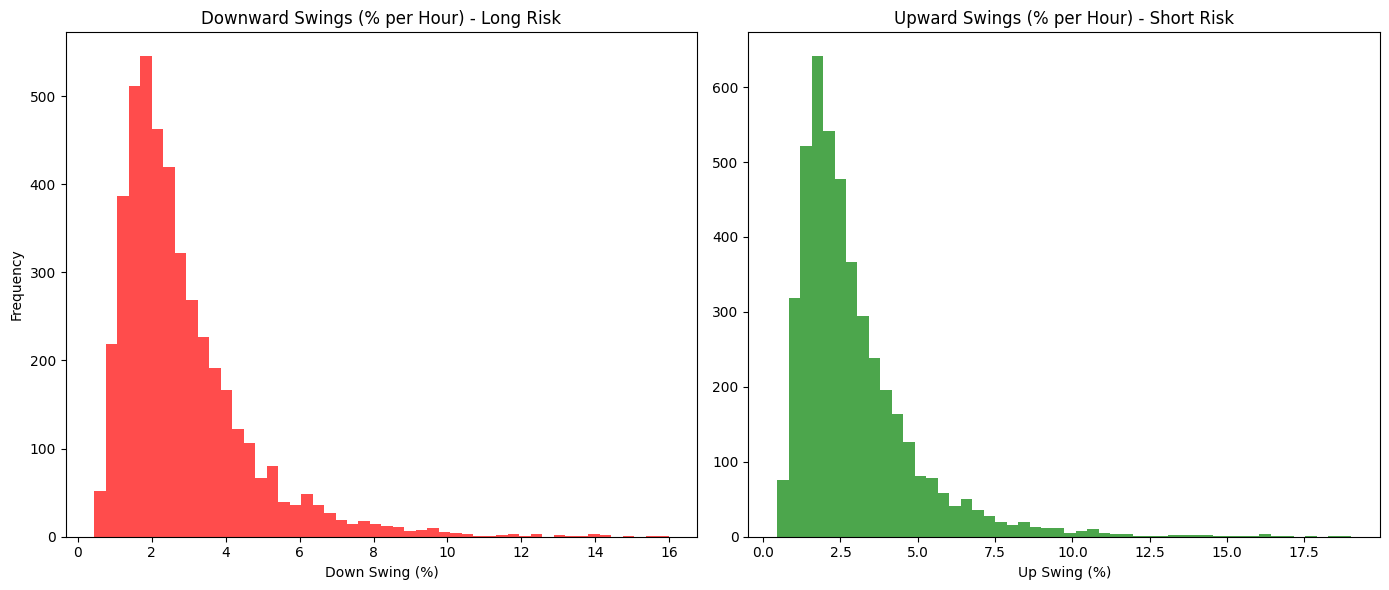

Directional Swing Summary:
--------------------------
Max Down Swing (Long Risk): 25.31%
95th Percentile Down Swing: 6.31%
99th Percentile Down Swing: 9.58%
Max Up Swing (Short Risk): 33.90%
95th Percentile Up Swing: 6.74%
99th Percentile Up Swing: 10.59%


In [7]:
import ccxt
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

# Initialize exchange
exchange = ccxt.binance()

symbol = 'SOL/USDT'  # Change this to your desired coin

# Get data (last 1 year hourly)
timeframe = '4h'
since = exchange.parse8601('2023-07-01T00:00:00Z')

all_candles = []

print("Fetching data...")

while True:
    candles = exchange.fetch_ohlcv(symbol, timeframe, since, limit=1000)
    if not candles:
        break
    all_candles += candles
    since = candles[-1][0] + 1
    time.sleep(exchange.rateLimit / 1000)

print(f"Fetched {len(all_candles)} candles.")

# Create DataFrame
df = pd.DataFrame(all_candles, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Calculate directional swings
df['down_swing_pct'] = ((df['high'] - df['low']) / df['high']) * 100  # Max drop within candle

df['up_swing_pct'] = ((df['high'] - df['low']) / df['low']) * 100  # Max rise within candle

# For visualization, remove extreme outliers (>99.9 percentile) for clean plots
cap_down = np.percentile(df['down_swing_pct'], 99.9)
cap_up = np.percentile(df['up_swing_pct'], 99.9)

clean_down_swings = df['down_swing_pct'][df['down_swing_pct'] <= cap_down]
clean_up_swings = df['up_swing_pct'][df['up_swing_pct'] <= cap_up]

# Plot histograms
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.hist(clean_down_swings, bins=50, color='red', alpha=0.7)
plt.title('Downward Swings (% per Hour) - Long Risk')
plt.xlabel('Down Swing (%)')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(clean_up_swings, bins=50, color='green', alpha=0.7)
plt.title('Upward Swings (% per Hour) - Short Risk')
plt.xlabel('Up Swing (%)')

plt.tight_layout()
plt.show()

# Print summary stats
print("Directional Swing Summary:")
print("--------------------------")
print(f"Max Down Swing (Long Risk): {df['down_swing_pct'].max():.2f}%")
print(f"95th Percentile Down Swing: {np.percentile(df['down_swing_pct'],95):.2f}%")
print(f"99th Percentile Down Swing: {np.percentile(df['down_swing_pct'],99):.2f}%")

print(f"Max Up Swing (Short Risk): {df['up_swing_pct'].max():.2f}%")
print(f"95th Percentile Up Swing: {np.percentile(df['up_swing_pct'],95):.2f}%")
print(f"99th Percentile Up Swing: {np.percentile(df['up_swing_pct'],99):.2f}%")

In [15]:
df['down_swing_pct'].max()/100

np.float64(0.17107393205568794)

In [12]:
174.71*(1-np.percentile(df['down_swing_pct'],99.9)/100)

np.float64(145.8271264681582)

In [1]:
import selenium